# Clusterização

## Trabalhando com dados categóricos



In [2]:
import pandas as pd

df = pd.read_csv('dados/exemplo2.csv')
df.head()

,idade,conta_corrente,risco
0,21.257389,783.127911,ruim
1,21.766573,979.747521,bom
2,25.321033,1065.328054,ruim
3,23.919268,1195.758078,bom
4,21.805298,1083.764450,bom


Nesse exemplo, temos uma coluna indicando o risco do cliente de forma categórica: bom ou ruim. Para a clusterização, precisamos transformar dados categóricos em dados numéricos.

O forma mais adequado para a quantificação de dados categóricos é através do método conhecido como _one hot encoder_. Esse método utiliza a binarização para a tranformação dos dados. No ```exemplo2```, temos duas opções de valores para a coluna ```risco```: bom ou ruim. Para binarizar essa coluna, criaremos uma nova coluna identificada como ```risco_bom```, tendo valor igual a 1, caso o risco seja bom e 0 caso contrário. 

Para executar a transformação criaremos uma função chamada ```encoder()```, que recebe a coluna (nesse caso o risco) e a categoria que corresponde ao valor 1 (verdadeiro), retornando 1, caso ```coluna = categoria``` e 0, caso contrário.

In [3]:
def encoder(column, true_value):
    if column == true_value:
        return 1.0
    else:
        return 0.0

Para criar a nova coluna com base na função definida acima, utilizamos o comando ```Series.apply(função, args=())```.

In [4]:
df['risco_bom'] = df.risco.apply(encoder, args=('bom',))
df.head()

,idade,conta_corrente,risco,risco_bom
0,21.257389,783.127911,ruim,0.0
1,21.766573,979.747521,bom,1.0
2,25.321033,1065.328054,ruim,0.0
3,23.919268,1195.758078,bom,1.0
4,21.805298,1083.764450,bom,1.0


Eliminaremos, agora, o coluna ```risco``` utilizando o comando ```DataFrame.drop("nome_da_coluna", axis=1, inplace=True)```

In [5]:
df.drop('risco', axis=1, inplace=True)
df.head()

,idade,conta_corrente,risco_bom
0,21.257389,783.127911,0.0
1,21.766573,979.747521,1.0
2,25.321033,1065.328054,0.0
3,23.919268,1195.758078,1.0
4,21.805298,1083.764450,1.0


Com a nova coluna, podemos aplicar algoritmos de clusterização. Faremos um teste com o ```Kmeans```, lembrando de normalizar os dados utilizando o ```MinMaxScaler```.

__Observação__: como a coluna ```risco_bom``` já está definida na escala entre 0 e 1, a mesma não será afetada pela normalização.

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['idade', 'conta_corrente', 'risco_bom']])
df['km_3'] = KMeans(n_clusters=3, random_state=1).fit_predict(X)

In [7]:
import matplotlib.pyplot as plt

def plot(x, y, column_name):
    plt.figure(figsize=(10, 7))
    plt.xlabel(x)
    plt.ylabel(y)
    for c in sorted(df[column_name].unique()):
        plt.scatter(df[df[column_name] == c][x], df[df[column_name] == c][y]) 
    plt.legend([f'cluster {c}' for c in sorted(df[column_name].unique())])

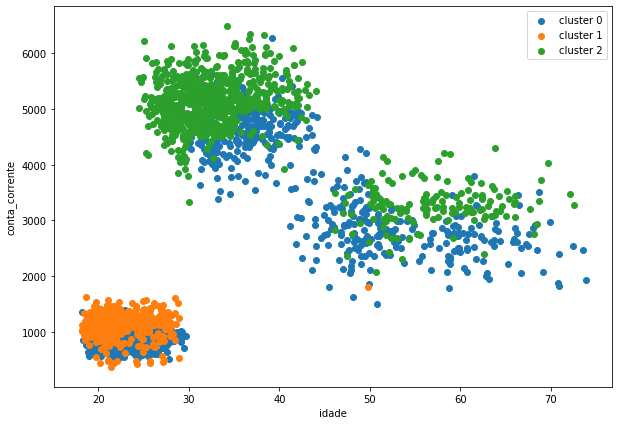

In [8]:
plot('idade', 'conta_corrente', 'km_3')

In [9]:
for c in sorted(df.km_3.unique()):
    n = df[df.km_3 == c].risco_bom.mean()
    print(f'cluster {c}: risco bom = {n * 100} %')

cluster 0: risco bom = 0.0 %
cluster 1: risco bom = 100.0 %
cluster 2: risco bom = 100.0 %


In [10]:
def cluster_report(df, columns, cluster_column):
    for c in sorted(df[cluster_column].unique()):
        print(f'Cluster {c}')
        for column in columns:
            if len(df[column].unique()) > 2:
                print(f'- {column}: mean = {df[df[cluster_column] == c][column].mean()}')
            else:
                n = df[df[cluster_column] == c][column].mean()
                print(f'- {column}: count = {n * 100} %')

In [11]:
cluster_report(df, df.columns.values[0:3], 'km_3')

Cluster 0
- idade: mean = 32.95122625257916
- conta_corrente: mean = 2095.40948161314
- risco_bom: count = 0.0 %
Cluster 1
- idade: mean = 22.35180574907043
- conta_corrente: mean = 1112.2331189415725
- risco_bom: count = 100.0 %
Cluster 2
- idade: mean = 36.978460955791476
- conta_corrente: mean = 4808.145796072836
- risco_bom: count = 100.0 %


In [12]:
df['km_4'] = KMeans(n_clusters=4, random_state=1).fit_predict(X)
df['km_5'] = KMeans(n_clusters=5, random_state=1).fit_predict(X)
df['km_6'] = KMeans(n_clusters=6, random_state=1).fit_predict(X)

In [13]:
cluster_report(df, df.columns.values[0:3], 'km_6')

Cluster 0
- idade: mean = 23.303504116727744
- conta_corrente: mean = 892.8037889276358
- risco_bom: count = 0.0 %
Cluster 1
- idade: mean = 22.304747860872794
- conta_corrente: mean = 1111.0541513348442
- risco_bom: count = 100.0 %
Cluster 2
- idade: mean = 32.453925657389604
- conta_corrente: mean = 5153.194669563995
- risco_bom: count = 100.0 %
Cluster 3
- idade: mean = 54.14411020347421
- conta_corrente: mean = 2746.411343282708
- risco_bom: count = 0.0 %
Cluster 4
- idade: mean = 56.934335179649985
- conta_corrente: mean = 3272.9654266867205
- risco_bom: count = 100.0 %
Cluster 5
- idade: mean = 36.82627224263472
- conta_corrente: mean = 4577.569291749365
- risco_bom: count = 0.0 %


In [15]:
df2 = pd.read_csv('dados/exemplo3.csv')
df2.head()

,idade,conta_corrente,sexo,risco
0,21.257389,783.127911,masculino,ruim
1,21.766573,979.747521,feminino,bom
2,25.321033,1065.328054,feminino,bom
3,23.919268,1195.758078,feminino,bom
4,21.805298,1083.764450,feminino,bom


In [16]:
df2['risco_bom'] = df2.risco.apply(encoder, args=('bom',))
df2['sexo_masculino'] = df2.sexo.apply(encoder, args=('masculino',))
df2.drop('sexo', axis=1, inplace=True)
df2.drop('risco', axis=1, inplace=True)
df2.head()

,idade,conta_corrente,risco_bom,sexo_masculino
0,21.257389,783.127911,0.0,1.0
1,21.766573,979.747521,1.0,0.0
2,25.321033,1065.328054,1.0,0.0
3,23.919268,1195.758078,1.0,0.0
4,21.805298,1083.764450,1.0,0.0


In [17]:
X = MinMaxScaler().fit_transform(df2[['idade', 'conta_corrente', 'risco_bom', 'sexo_masculino']])
df2['km_3'] = KMeans(n_clusters=3, random_state=1).fit_predict(X)
df2.head()

,idade,conta_corrente,risco_bom,sexo_masculino,km_3
0,21.257389,783.127911,0.0,1.0,0
1,21.766573,979.747521,1.0,0.0,1
2,25.321033,1065.328054,1.0,0.0,1
3,23.919268,1195.758078,1.0,0.0,1
4,21.805298,1083.764450,1.0,0.0,1


In [18]:
cluster_report(df2, df2.columns.values[0:4], 'km_3')

Cluster 0
- idade: mean = 33.06556739891999
- conta_corrente: mean = 2099.935581556636
- risco_bom: count = 0.0 %
- sexo_masculino: count = 59.04761904761905 %
Cluster 1
- idade: mean = 31.13198723733135
- conta_corrente: mean = 3043.8601326847474
- risco_bom: count = 100.0 %
- sexo_masculino: count = 0.0 %
Cluster 2
- idade: mean = 30.934583754682933
- conta_corrente: mean = 3301.585452141532
- risco_bom: count = 100.0 %
- sexo_masculino: count = 100.0 %


In [19]:
df2['km_4'] = KMeans(n_clusters=4, random_state=1).fit_predict(X)
df2['km_5'] = KMeans(n_clusters=5, random_state=1).fit_predict(X)
df2['km_6'] = KMeans(n_clusters=6, random_state=1).fit_predict(X)

In [20]:
k = 10
df2[f'km_{k}'] = KMeans(n_clusters=k, random_state=1).fit_predict(X)
cluster_report(df2, df2.columns.values[0:4], f'km_{k}')

Cluster 0
- idade: mean = 23.04249450448745
- conta_corrente: mean = 885.6266167706968
- risco_bom: count = 0.0 %
- sexo_masculino: count = 0.0 %
Cluster 1
- idade: mean = 32.854090296333226
- conta_corrente: mean = 5120.53892024885
- risco_bom: count = 100.0 %
- sexo_masculino: count = 0.0 %
Cluster 2
- idade: mean = 32.41618857720974
- conta_corrente: mean = 5141.148601937596
- risco_bom: count = 100.0 %
- sexo_masculino: count = 100.0 %
Cluster 3
- idade: mean = 23.454019079971687
- conta_corrente: mean = 902.733633147001
- risco_bom: count = 0.0 %
- sexo_masculino: count = 100.0 %
Cluster 4
- idade: mean = 22.162928520248137
- conta_corrente: mean = 1127.7377476345093
- risco_bom: count = 100.0 %
- sexo_masculino: count = 100.0 %
Cluster 5
- idade: mean = 22.66954579082227
- conta_corrente: mean = 1044.6261074209237
- risco_bom: count = 100.0 %
- sexo_masculino: count = 0.0 %
Cluster 6
- idade: mean = 46.132040576999614
- conta_corrente: mean = 3617.3431555573716
- risco_bom: count

In [21]:
def cluster_report_perc(df, columns, cluster_column):
    for c in sorted(df[cluster_column].unique()):
        print(f'Cluster {c}')
        for column in columns:
            if len(df[column].unique()) > 2:
                value = df[df[cluster_column] == c][column].mean()
                ref = df[column].mean()
                print(f'- {column}: mean = {round((value - ref) / ref * 100, 2)} %')
            else:
                n = df[df[cluster_column] == c][column].mean()
                print(f'- {column}: count = {n * 100} %')

In [22]:
cluster_report_perc(df2, df2.columns.values[0:4], 'km_6')

Cluster 0
- idade: mean = 19.33 %
- conta_corrente: mean = 69.12 %
- risco_bom: count = 100.0 %
- sexo_masculino: count = 0.0 %
Cluster 1
- idade: mean = 5.3 %
- conta_corrente: mean = -23.76 %
- risco_bom: count = 0.0 %
- sexo_masculino: count = 100.0 %
Cluster 2
- idade: mean = 16.3 %
- conta_corrente: mean = 73.99 %
- risco_bom: count = 100.0 %
- sexo_masculino: count = 100.0 %
Cluster 3
- idade: mean = 2.02 %
- conta_corrente: mean = -24.15 %
- risco_bom: count = 0.0 %
- sexo_masculino: count = 0.0 %
Cluster 4
- idade: mean = -28.5 %
- conta_corrente: mean = -62.08 %
- risco_bom: count = 100.0 %
- sexo_masculino: count = 0.0 %
Cluster 5
- idade: mean = -30.32 %
- conta_corrente: mean = -59.14 %
- risco_bom: count = 100.0 %
- sexo_masculino: count = 100.0 %


In [26]:
def cluster_report_perc_df(df, columns, cluster_column):
    data = {}
    for c in sorted(df[cluster_column].unique()):
        data[f'cluster {c}'] = []
        for column in columns:
            if len(df[column].unique()) > 2:
                value = df[df[cluster_column] == c][column].mean()
                ref = df[column].mean()
                data[f'cluster {c}'].append(round((value - ref) / ref * 100, 2))
            else:
                n = df[df[cluster_column] == c][column].mean()
                data[f'cluster {c}'].append(n * 100)
    return pd.DataFrame(data, index=columns)

In [29]:
results = cluster_report_perc_df(df2, df2.columns.values[0:4], 'km_6')
results = results.transpose()
results

,idade,conta_corrente,risco_bom,sexo_masculino
cluster 0,19.33,69.12,100.0,0.0
cluster 1,5.30,-23.76,0.0,100.0
cluster 2,16.30,73.99,100.0,100.0
cluster 3,2.02,-24.15,0.0,0.0
cluster 4,-28.50,-62.08,100.0,0.0
cluster 5,-30.32,-59.14,100.0,100.0


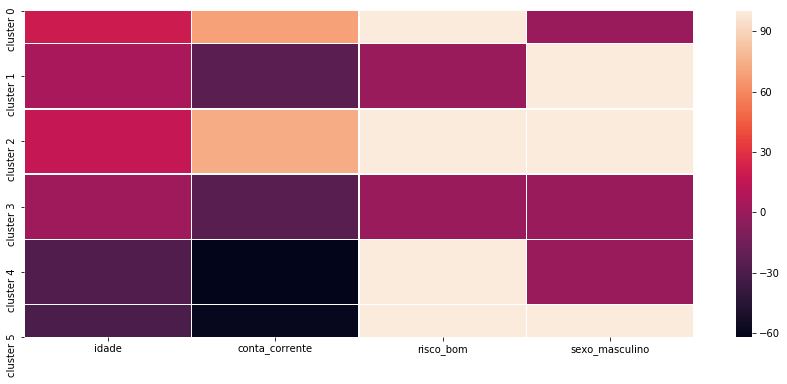

In [30]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(15, 6))
s = sns.heatmap(results, linewidths=.5)